In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns

In [6]:
cars_file = "https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv"

In [7]:
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

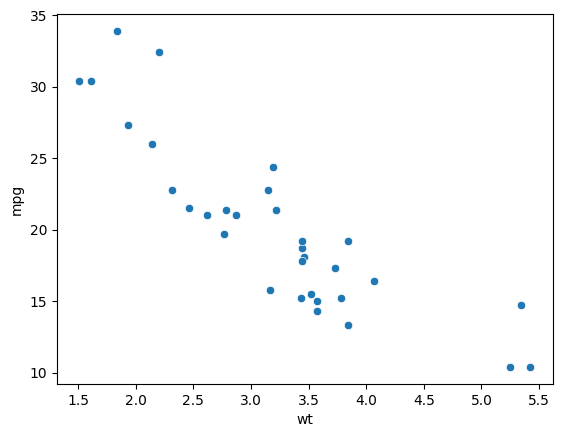

In [8]:
sns.scatterplot(x='wt', y='mpg', data=cars)

<Axes: xlabel='wt', ylabel='mpg'>

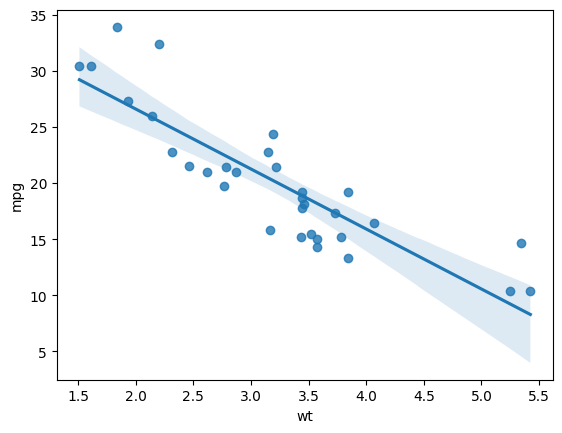

In [9]:
sns.regplot(x='wt', y='mpg', data=cars)

In [13]:
X_list = cars.wt.values
X_list, X_list.shape, type(X_list)

(array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
        3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
        1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
        1.513, 3.17 , 2.77 , 3.57 , 2.78 ]),
 (32,),
 numpy.ndarray)

In [14]:
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)
X_np.shape

(32, 1)

In [15]:
y_list = cars.mpg.values
y_list, y_list.shape, type(y_list)

(array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
        15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4]),
 (32,),
 numpy.ndarray)

In [17]:
# Both methods convert the numpy array to torch tensor, here I showed both
X = torch.from_numpy(X_np)
y = torch.tensor(y_list.tolist())

In [53]:
# Define ML (linear regression -> y = wx + b) model
w = torch.rand(1, requires_grad=True, dtype=torch.float32) # weight -> requires_grad is true to calculate gradient during training
b = torch.rand(1, requires_grad=True, dtype=torch.float32) # bias -> requires_grad is true to calculate gradient during training

# Define hyperparameters
learning_rate = 0.001
num_epochs = 2000

In [54]:
# Start training
for epoch in range(num_epochs): # train for nth epochs
  for i in range(len(X)): # iterate over all the training samples
    # forward pass
    y_pred = (X[i]*w) + b

    # calulate loss
    loss = torch.pow(y_pred - y[i], 2)  # mean squared error

    # backpropagate
    loss.backward()

    # extract loss values
    loss_values = loss.data[0]

    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()

  if epoch % 100 == 0:
    print(f"epoch: {epoch} \t loss_value: {loss_values:.2f} \t weight: {w.data[0]:.2f} \t bias: {b.data[0]:.2f}")
print(f"epoch: {epoch} \t loss_value: {loss_values:.2f} \t weight: {w.data[0]:.2f} \t bias: {b.data[0]:.2f}")

epoch: 0 	 loss_value: 171.10 	 weight: 2.70 	 bias: 1.04
epoch: 100 	 loss_value: 11.66 	 weight: 0.95 	 bias: 15.39
epoch: 200 	 loss_value: 2.99 	 weight: -1.47 	 bias: 23.80
epoch: 300 	 loss_value: 0.48 	 weight: -2.96 	 bias: 28.94
epoch: 400 	 loss_value: 0.00 	 weight: -3.87 	 bias: 32.09
epoch: 500 	 loss_value: 0.11 	 weight: -4.43 	 bias: 34.02
epoch: 600 	 loss_value: 0.32 	 weight: -4.77 	 bias: 35.20
epoch: 700 	 loss_value: 0.50 	 weight: -4.98 	 bias: 35.93
epoch: 800 	 loss_value: 0.63 	 weight: -5.10 	 bias: 36.37
epoch: 900 	 loss_value: 0.72 	 weight: -5.18 	 bias: 36.64
epoch: 1000 	 loss_value: 0.78 	 weight: -5.23 	 bias: 36.81
epoch: 1100 	 loss_value: 0.82 	 weight: -5.26 	 bias: 36.91
epoch: 1200 	 loss_value: 0.84 	 weight: -5.28 	 bias: 36.97
epoch: 1300 	 loss_value: 0.85 	 weight: -5.29 	 bias: 37.01
epoch: 1400 	 loss_value: 0.86 	 weight: -5.30 	 bias: 37.03
epoch: 1500 	 loss_value: 0.87 	 weight: -5.30 	 bias: 37.05
epoch: 1600 	 loss_value: 0.87 	 wei

<Axes: xlabel='wt', ylabel='mpg'>

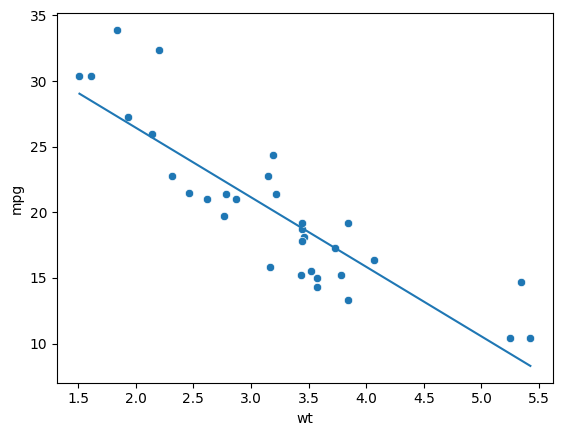

In [71]:
# visualize the results
y_pred = X_list*w.detach().numpy() + b.detach().numpy()
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.lineplot(x=X_list, y=y_pred)